# 支持向量机SVM（Support Vector Machine）

## 【关键词】支持向量，最大几何间隔，拉格朗日乘子法

## 一、支持向量机的原理

Support Vector Machine。支持向量机，其含义是通过支持向量运算的分类器。其中“机”的意思是机器，可以理解为分类器。
那么什么是支持向量呢？在求解的过程中，会发现只根据部分数据就可以确定分类器，这些数据称为支持向量。
见下图，在一个二维环境中，其中点R，S，G点和其它靠近中间黑线的点可以看作为支持向量，它们可以决定分类器，也就是黑线的具体参数。

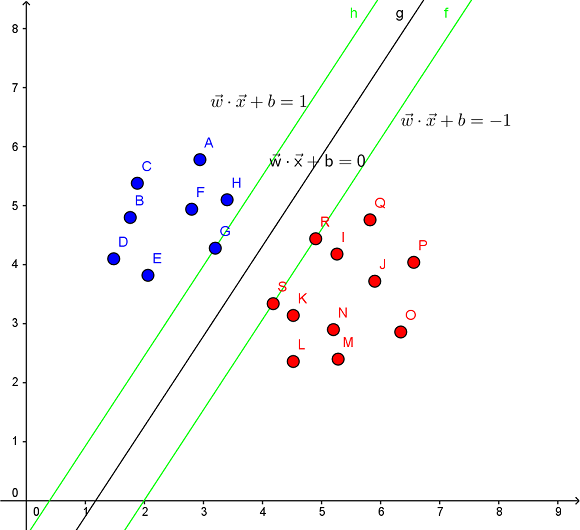

解决的问题：

- 线性分类

在训练数据中，每个数据都有n个的属性和一个二类类别标志，我们可以认为这些数据在一个n维空间里。我们的目标是找到一个n-1维的超平面（hyperplane），这个超平面可以将数据分成两部分，每部分数据都属于同一个类别。
其实这样的超平面有很多，我们要找到一个最佳的。因此，增加一个约束条件：这个超平面到每边最近数据点的距离是最大的。也成为最大间隔超平面（maximum-margin hyperplane）。这个分类器也成为最大间隔分类器（maximum-margin classifier）。
支持向量机是一个二类分类器。

- 非线性分类

SVM的一个优势是支持非线性分类。它结合使用拉格朗日乘子法和KKT条件，以及核函数可以产生非线性分类器。

SVM的目的是要找到一个线性分类的最佳超平面 f(x)=xw+b=0。求 w 和 b。

首先通过两个分类的最近点，找到f(x)的约束条件。

有了约束条件，就可以通过拉格朗日乘子法和KKT条件来求解，这时，问题变成了求拉格朗日乘子αi 和 b。

对于异常点的情况，加入松弛变量ξ来处理。

非线性分类的问题：映射到高维度、使用核函数。

#### 线性分类及其约束条件

SVM的解决问题的思路是找到离超平面的最近点，通过其约束条件求出最优解。

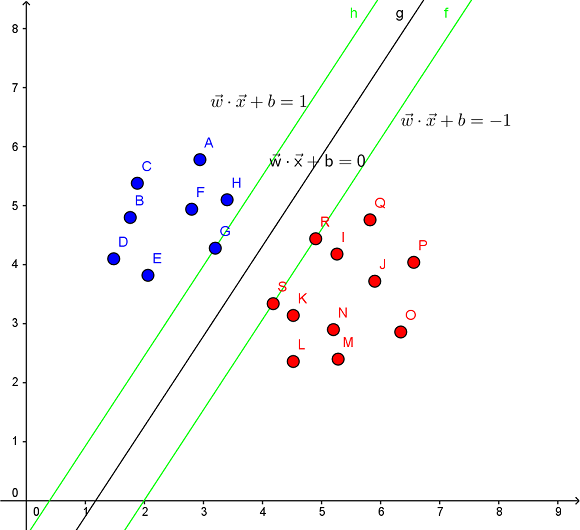

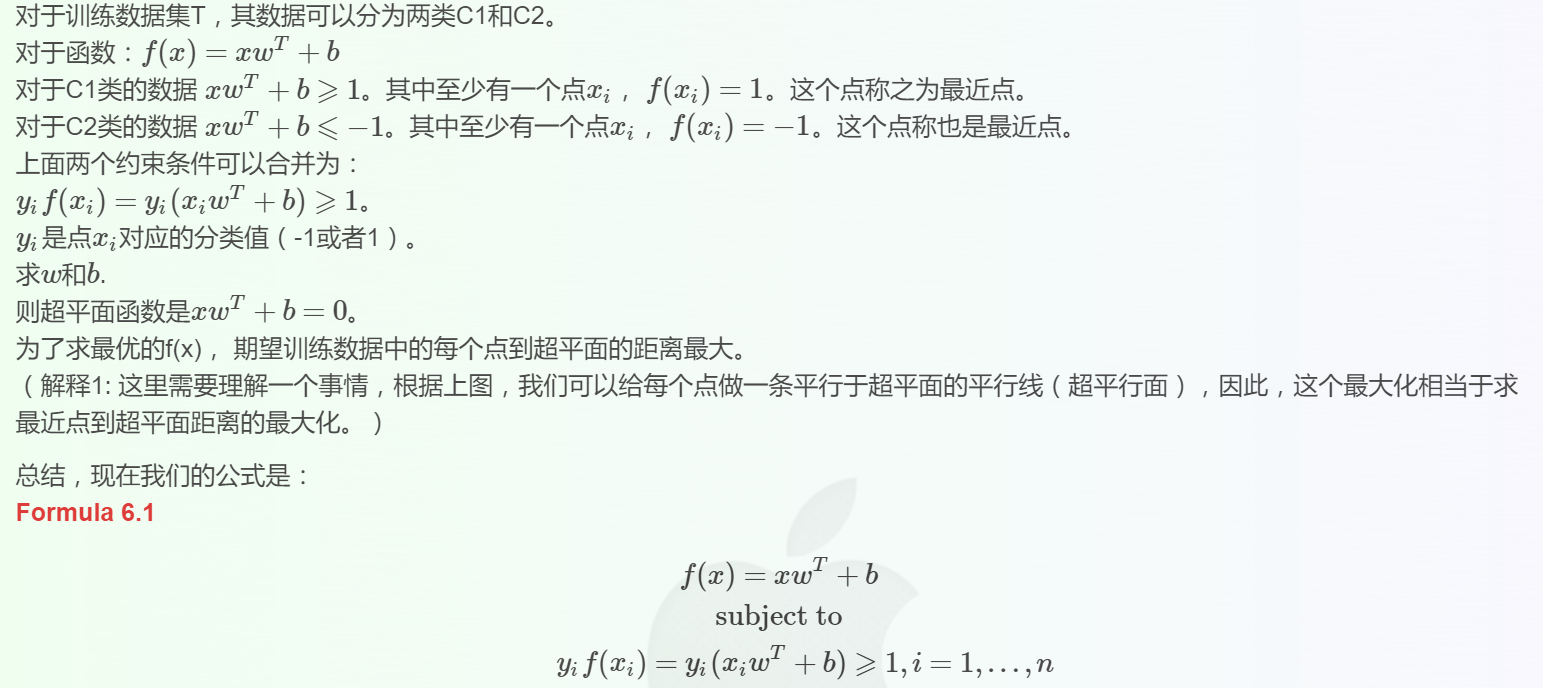

#### 最大几何间隔（geometrical margin）

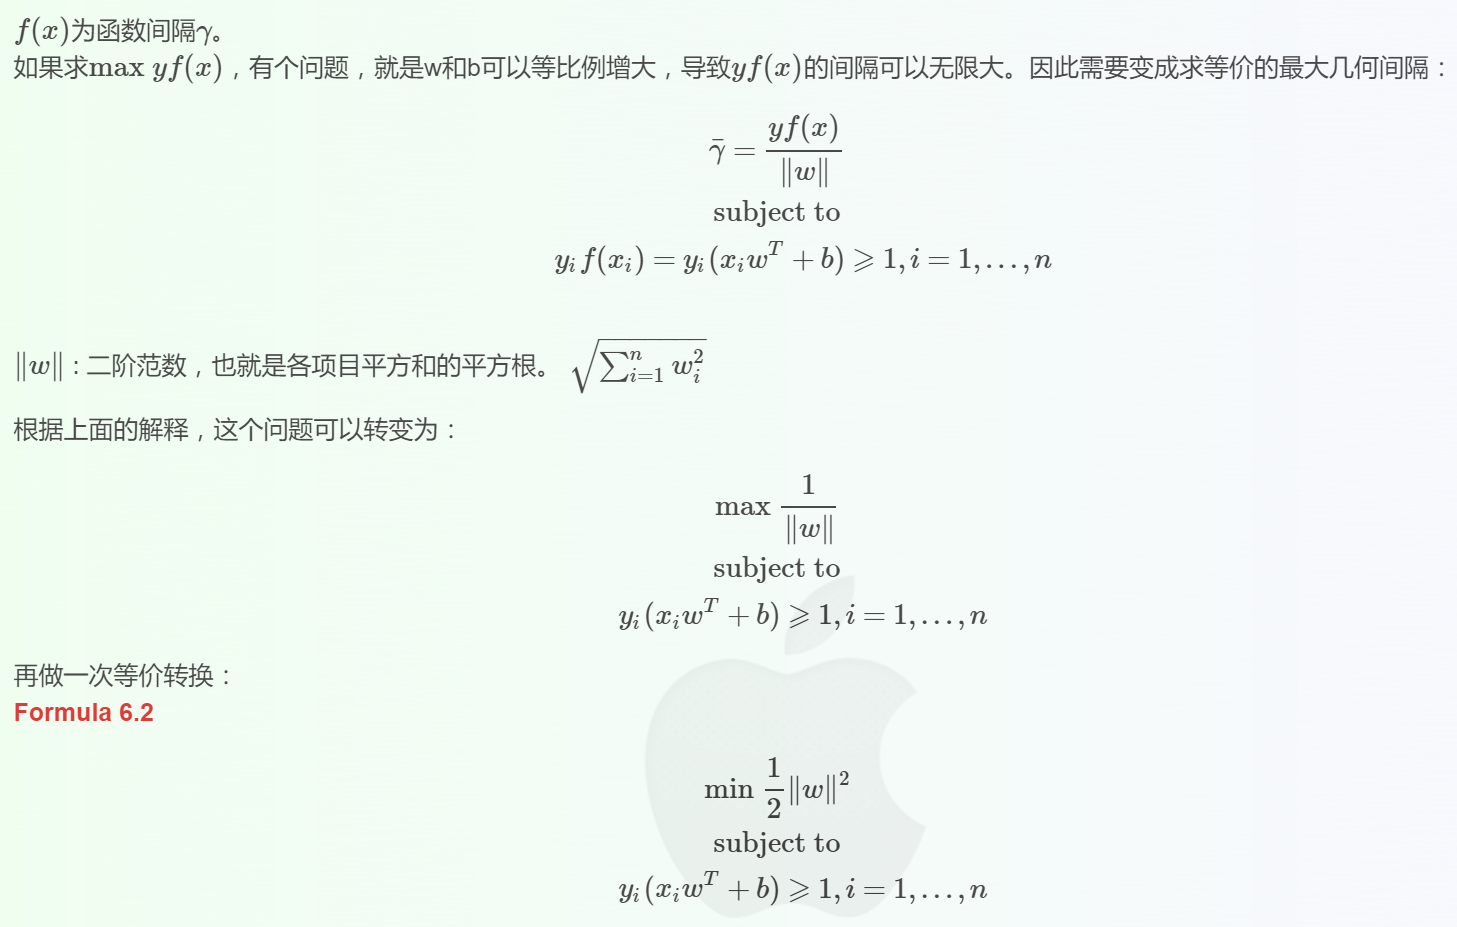

#### 求解问题w,b

我们使用拉格朗日乘子法(http://blog.csdn.net/on2way/article/details/47729419)
来求w和b，一个重要原因是使用拉格朗日乘子法后,还可以解决非线性划分问题。
拉格朗日乘子法可以解决下面这个问题：

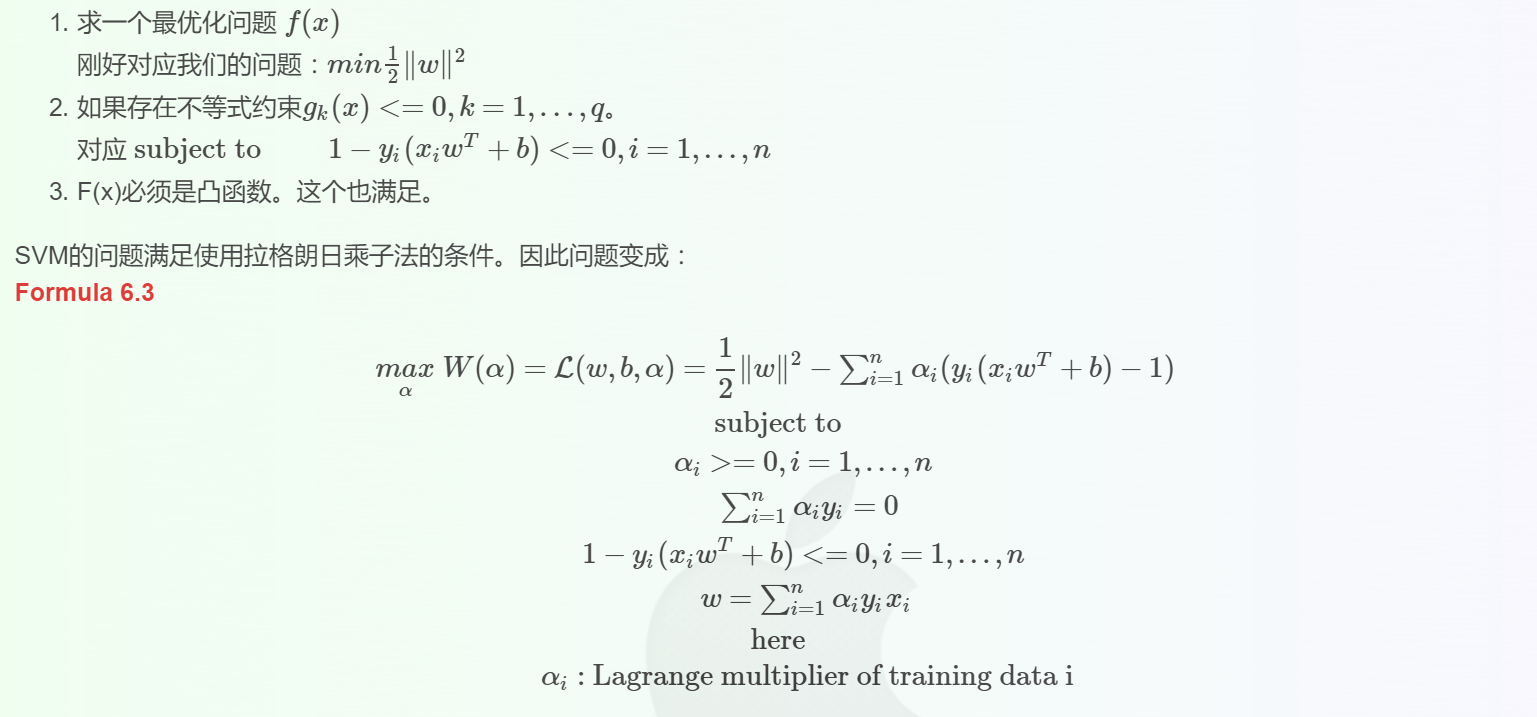

消除w之后变为：

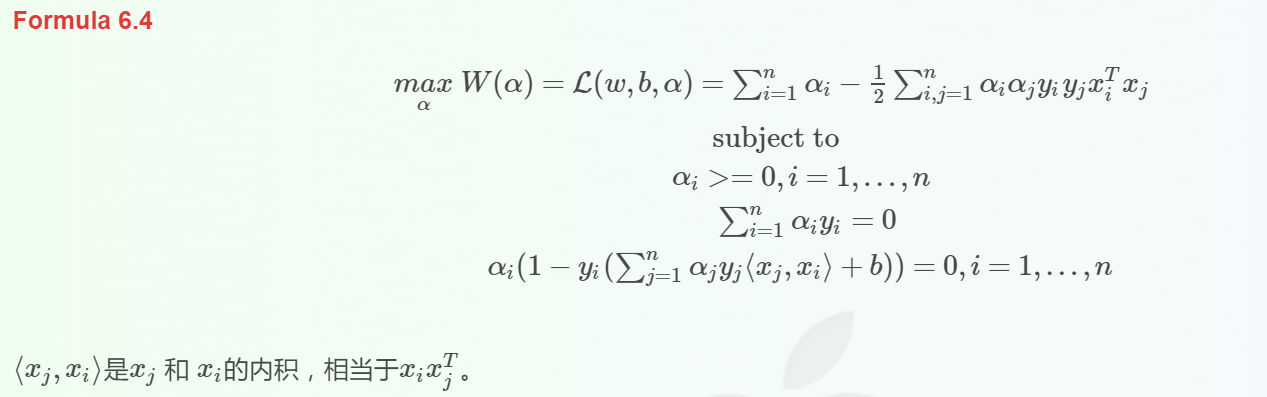

可见使用拉格朗日乘子法后，求w,b的问题变成了求拉格朗日乘子αi和b的问题。
到后面更有趣，变成了不求w了，因为αi可以直接使用到分类器中去，并且可以使用αi支持非线性的情况.

## 二、实战

### 1、画出决策边界

导包sklearn.svm

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [24]:
data

array([[ 2.89167481,  3.80434843],
       [ 0.22999733,  5.97543825],
       [ 2.22458781,  6.08129947],
       [ 0.33653405,  5.65908029],
       [ 2.970555  ,  5.02956153],
       [ 1.05057188,  7.89673857],
       [ 1.29026591,  6.32878767],
       [-0.02057267,  8.52880372],
       [ 0.49010144,  7.6992321 ],
       [ 4.06742884,  4.318609  ],
       [ 1.84126385,  7.6770205 ],
       [ 3.46651387,  2.90391744],
       [ 3.06161026,  5.60074102],
       [ 3.75786758,  4.99784423],
       [-0.77654777,  7.82134765],
       [ 6.03167378,  4.41374593],
       [ 1.96675473,  5.24267903],
       [ 2.1986223 ,  5.00884224],
       [ 3.9609713 ,  5.34097729],
       [ 4.13135318,  5.48455241],
       [ 3.30361715,  4.78818587],
       [ 0.16036662,  6.0927724 ],
       [-0.57962335,  8.91780975],
       [ 0.55891004,  6.61039455],
       [ 3.28836352,  4.44306244],
       [ 3.66020219,  4.34622801],
       [-0.61313947,  5.76041262],
       [ 2.94463698,  3.29103712],
       [ 2.49713118,

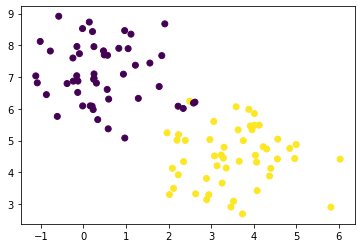

In [18]:
data, target = make_blobs(centers=2)
plt.scatter(data[:, 0], data[:, 1], c=target)

训练模型，并训练

In [20]:
# C=1.0  软间隔
# kernel='rbf' 核函数   radial based function 其实就是高斯核函数. 可以处理线性不可分问题
# gamma非线性核函数使用的系数
svc = SVC(kernel='linear', C=0.1)

In [21]:
svc.fit(data, target)

SVC(C=0.1, kernel='linear')

In [22]:
# 线性核函数有线性方程的系数和截距
svc.coef_

array([[ 0.62453565, -0.56385943]])

In [23]:
# 截距
svc.intercept_

array([1.98074811])

In [58]:
svc.score(data, target)

1.0

In [59]:
# 支持向量
supports = svc.support_vectors_
supports

array([[-6.55354483, -4.26828266],
       [-9.53716007, -5.44751016],
       [-8.13212304, -5.25099836],
       [-7.62902843, -5.00386325],
       [-7.73319785, -5.8768316 ],
       [-5.56952792, -6.42984747],
       [-6.91871882, -6.68804692],
       [-7.97146852, -7.21823416],
       [-6.78306855, -7.13362526],
       [-7.97285537, -6.83298947]])

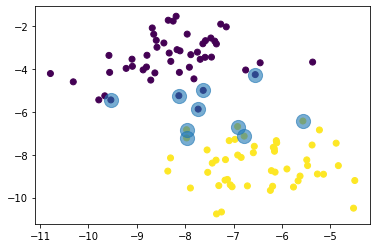

In [60]:
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.scatter(supports[:, 0], supports[:, 1], s=200, alpha=0.6)

In [18]:
data

array([[-5.51740115,  8.19987949],
       [-5.89941568,  6.15922142],
       [-1.66021786,  5.07578609],
       [-1.19150507,  5.32934209],
       [-6.68360593,  7.25271813],
       [-1.23437751,  6.96259544],
       [-1.46477091,  4.5076748 ],
       [-7.23733966,  9.36027984],
       [-6.7680229 ,  6.24983272],
       [-7.46130831,  5.74543829],
       [-8.45370967,  7.41093365],
       [-7.79542794,  6.01020705],
       [-6.99185633,  6.38584123],
       [-4.77257045,  7.83169787],
       [-1.8512366 ,  3.47005462],
       [-2.50018215,  3.39246727],
       [-6.98722923,  7.86554859],
       [-1.94790194,  3.44335457],
       [-1.73778604,  4.72729762],
       [-5.46580314,  4.61387361],
       [-3.3703969 ,  6.66755349],
       [-3.11111586,  4.22923908],
       [-0.57376814,  6.17038751],
       [-6.15146776,  6.67926614],
       [-4.75282004,  7.39133757],
       [-0.8915458 ,  4.98275834],
       [-0.49702848,  4.70030443],
       [-2.55900245,  4.48064798],
       [-6.75240322,

In [61]:
# 线性核函数的斜率和截距
w1, w2 = svc.coef_[0, 0], svc.coef_[0, 1]
display(w1, w2)

0.2850945252188395

-0.7204864245386933

In [62]:
# 截距
b = svc.intercept_[0]
b

-2.2061970745405683

In [ ]:
y = w1 * x1 + w2 * x2 + b
0 = w1* x + w2 * y +b
y = -w1 / w2 * x - b / w2

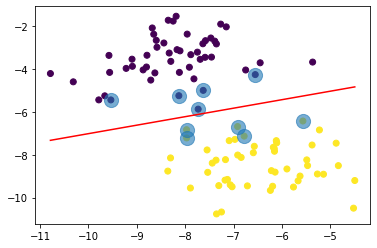

In [63]:
plt.scatter(data[:, 0], data[:, 1], c=target)
x = np.linspace(data[:,0].min(), data[:, 0].max(), 100)
y = -w1 / w2 * x - b / w2
plt.plot(x, y, c='r')
plt.scatter(supports[:, 0], supports[:, 1], s=200, alpha=0.6)

In [68]:
supports

array([[-6.55354483, -4.26828266],
       [-9.53716007, -5.44751016],
       [-8.13212304, -5.25099836],
       [-7.62902843, -5.00386325],
       [-7.73319785, -5.8768316 ],
       [-5.56952792, -6.42984747],
       [-6.91871882, -6.68804692],
       [-7.97146852, -7.21823416],
       [-6.78306855, -7.13362526],
       [-7.97285537, -6.83298947]])

In [65]:
# 画出上下边界
# 已知线上一点的坐标和线的斜率,求截距
# y = wx + b-> b = y - wx
b_up = -4.26828266 - (-w1 / w2) * -6.55354483
b_up

-1.675062734995167

In [69]:
# 同理可求b_down
b_down = -7.13362526 - (-w1/w2) * -6.78306855
b_down

-4.449583421144731

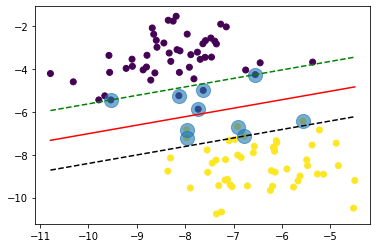

In [70]:
plt.scatter(data[:, 0], data[:, 1], c=target)
x = np.linspace(data[:,0].min(), data[:, 0].max(), 10)
y = -w1 / w2 * x - b / w2
plt.plot(x, y, c='r')
plt.scatter(supports[:, 0], supports[:, 1], s=200, alpha=0.6)

y_up = -w1 / w2 * x + b_up

plt.plot(x, y_up, c='g', ls='--')

y_down = -w1/ w2 * x + b_down
plt.plot(x, y_down, c='k', ls='--')

提取系数获取斜率

线性方程的截距

上边界和下边界  
support_vectors_

绘制图形

In [71]:
# 基于半径的核函数即线性不可分问题
from sklearn.datasets import make_circles

(-1.3109271716149469,
 1.393974960777136,
 -1.3415352849268072,
 1.310683943863384)

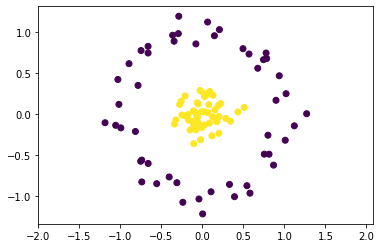

In [76]:
data, target = make_circles(noise=0.1, factor=0.2)
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.axis('equal')

In [77]:
svc = SVC(kernel='linear')
svc.fit(data, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
svc.support_vectors_

array([[ 8.67401270e-01, -6.25914621e-01],
       [-6.63199358e-01,  8.23090658e-01],
       [ 1.01993210e+00,  2.45558194e-01],
       [-7.99860776e-02,  8.52810803e-01],
       [ 8.97304487e-01,  1.64950875e-01],
       [ 3.29963881e-01, -8.61196918e-01],
       [-1.05829597e+00, -1.40015175e-01],
       [-1.18797707e+00, -1.08731362e-01],
       [ 7.98970011e-01, -2.61196577e-01],
       [-7.48693623e-01,  7.71738649e-01],
       [-7.39692449e-01, -8.30811546e-01],
       [-7.85677191e-01,  3.46446354e-01],
       [ 1.12062766e+00, -1.46727804e-01],
       [ 5.42546956e-01, -8.76591667e-01],
       [ 7.76202745e-01,  7.41941980e-01],
       [ 7.54413588e-01, -4.92159474e-01],
       [ 7.44424188e-01,  6.60260400e-01],
       [ 2.47005956e-03, -1.22097987e+00],
       [-6.62867986e-01,  7.41644953e-01],
       [-3.11677298e-01, -8.40185272e-01],
       [-5.57910734e-01, -8.52264992e-01],
       [ 2.06815898e-01,  1.02683742e+00],
       [ 6.28384751e-02,  1.11940195e+00],
       [ 6.

In [82]:
w1, w2 = svc.coef_[0, 0], svc.coef_[0, 1]
b = svc.intercept_[0]
display(w1, w2, b)

0.008201965676981046

-1.2857237181830783

0.5325447745458265

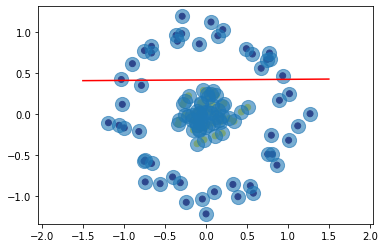

In [83]:
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.axis('equal')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=200, alpha=0.6)

x = np.linspace(-1.5, 1.5 , 10)
y = -w1 / w2 * x - b / w2

plt.plot(x, y, c='r')

In [80]:
svc.coef_

array([[ 0.00820197, -1.28572372]])

In [88]:
# 使用基于半径的核函数应对线性不可分的问题 radial based function
svc = SVC(kernel='rbf', C=10)
svc.fit(data, target)

d:\2005\.venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [89]:
svc.support_vectors_.shape

(9, 2)

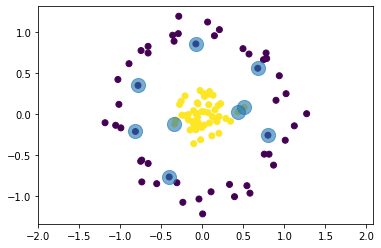

In [90]:
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.axis('equal')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=200, alpha=0.6)

In [91]:
# 取平面内所有的点,然后升维之后计算空间中的点距离分离超平面的距离.
x, y = np.linspace(data[:, 0].min(), data[:, 0].max(), 1000), np.linspace(data[:, 1].min(), data[:, 1].max(), 1000)
X, Y = np.meshgrid(x, y)
XY = np.c_[X.ravel(), Y.ravel()]
distance = svc.decision_function(XY)

In [95]:
# 在分离超平面上方的点又225926
distance[distance > 0].shape

(225926,)

In [96]:
# 超平面下方有774074个点.
distance[distance < 0].shape

(774074,)

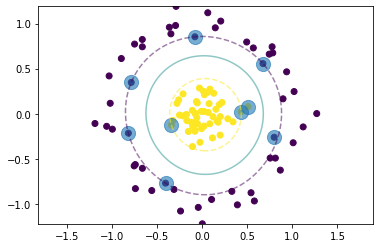

In [98]:
# 根据svm的原理,不会有点在分离超平面内部.
plt.scatter(data[:, 0], data[:, 1], c=target)
plt.axis('equal')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=200, alpha=0.6)
plt.contour(X, Y, distance.reshape(1000, 1000), levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

### 2、SVM分离坐标点

导包

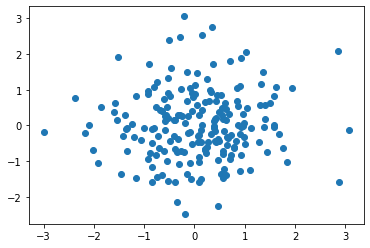

In [112]:
x, y = np.random.randn(200), np.random.randn(200)
plt.scatter(x, y)

In [113]:
data[:,0]> 0

array([ True, False,  True, False,  True, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True, False, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False])

In [114]:
data[:, 1]> 0

array([ True, False, False,  True,  True,  True,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False])

In [122]:
x.shape

(200,)

In [123]:
data = np.c_[x, y]

In [124]:
target = np.logical_xor(data[:,0]> 0, data[:, 1]> 0)

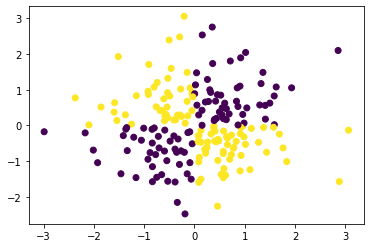

In [125]:
plt.scatter(x, y, c=target)

In [126]:
svc = SVC()
svc.fit(data, target)

d:\2005\.venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [127]:
# 只有线性核函数才有系数
svc.coef_

AttributeError: coef_ is only available when using a linear kernel

In [128]:
# 取平面内所有的点,然后升维之后计算空间中的点距离分离超平面的距离.
x, y = np.linspace(data[:, 0].min(), data[:, 0].max(), 1000), np.linspace(data[:, 1].min(), data[:, 1].max(), 1000)
X, Y = np.meshgrid(x, y)
XY = np.c_[X.ravel(), Y.ravel()]
distance = svc.decision_function(XY)

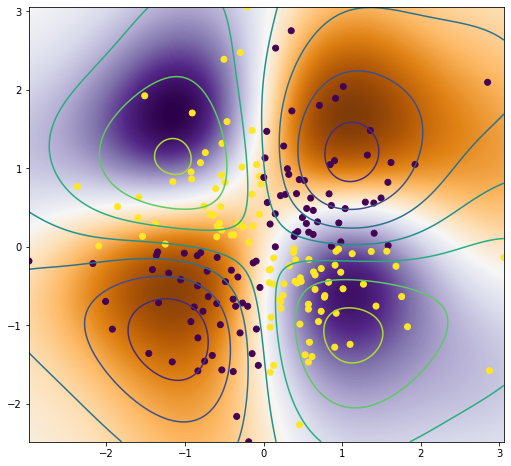

In [136]:
# 把一维的distance reshape成2维的,认为这个2维的数据是一个图片.
plt.figure(figsize=(10, 8))
plt.imshow(distance.reshape(1000, 1000), cmap='PuOr_r', extent=[data[:, 0].min(), data[:, 0].max(), data[:, 1].min(), data[:, 1].max()])
plt.contour(X, Y, distance.reshape(1000, 1000))

plt.scatter(data[:,0], data[:,1], c=target)

创造-3到3范围的点以及meshgrid

创造模型：rbf，训练数据

绘制图形  
绘制测试点到分离超平面的距离(decision_function)  
绘制轮廓线  
绘制训练点

### 3、使用多种核函数对iris数据集进行分类

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris.data[:, 0: 2]
target = iris.target


导包

In [141]:
from sklearn.svm import LinearSVC

In [139]:
x, y = np.linspace(data[:, 0].min(), data[:, 0].max(), 1000), np.linspace(data[:, 1].min(), data[:, 1].max(), 1000)
X, Y = np.meshgrid(x, y)
XY = np.c_[X.ravel(), Y.ravel()]

In [140]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(data, target)
y_linear = svc_linear.predict(XY)

In [144]:
# LinearSVC是svc(kernel='linear')的优化.
svc_Linear = LinearSVC(max_iter=10000)
svc_Linear.fit(data, target)
y_Linear = svc_Linear.predict(XY)

In [146]:
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(data, target)
y_rbf = svc_rbf.predict(XY)

In [147]:
svc_poly = SVC(kernel='poly', gamma='scale')
svc_poly.fit(data, target)
y_poly = svc_poly.predict(XY)

d:\2005\.venv\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.
d:\2005\.venv\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if __name__ == '__main__':
d:\2005\.venv\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the 

Text(0.5, 1.0, 'poly')

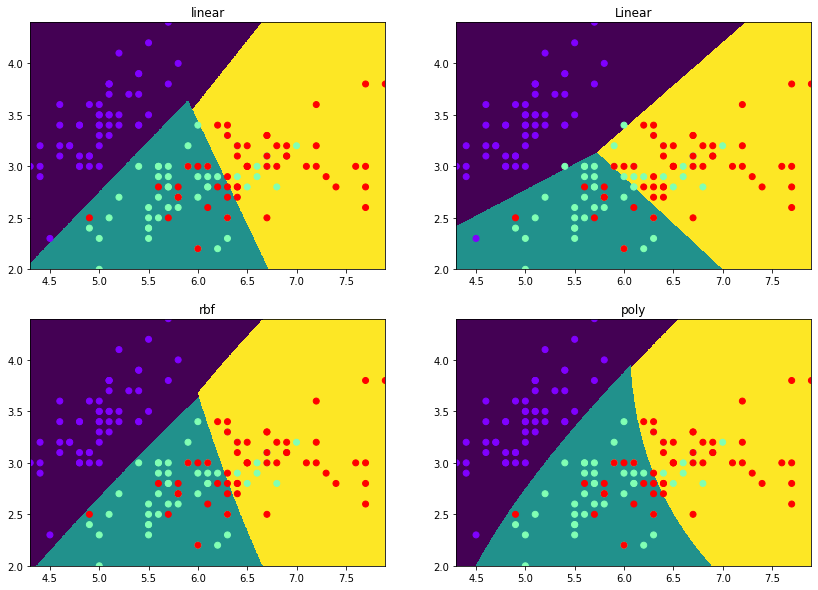

In [148]:
# 画2行2列
plt.figure(figsize=(2* 7, 2* 5))
axes1 = plt.subplot(2, 2, 1)
axes1.pcolormesh(X, Y, y_linear.reshape(1000, 1000))
axes1.scatter(data[:, 0], data[:, 1], c=target, cmap='rainbow')
axes1.set_title('linear')

axes2 = plt.subplot(2, 2, 2)
axes2.pcolormesh(X, Y, y_Linear.reshape(1000, 1000))
axes2.scatter(data[:, 0], data[:, 1], c=target, cmap='rainbow')
axes2.set_title('Linear')

axes3 = plt.subplot(2, 2, 3)
axes3.pcolormesh(X, Y, y_rbf.reshape(1000, 1000))
axes3.scatter(data[:, 0], data[:, 1], c=target, cmap='rainbow')
axes3.set_title('rbf')

axes4 = plt.subplot(2, 2, 4)
axes4.pcolormesh(X, Y, y_poly.reshape(1000, 1000))
axes4.scatter(data[:, 0], data[:, 1], c=target, cmap='rainbow')
axes4.set_title('poly')

提取数据只提取两个特征，方便画图  
创建支持向量机的模型：'linear', 'poly'(多项式), 'rbf'(Radial Basis Function:基于半径函数),

训练模型

图片背景点

预测并绘制图形for循环绘制图形

### 4、使用SVM多种核函数进行回归

In [150]:
from sklearn.svm import SVR

导包

自定义样本点rand，并且生成sin值

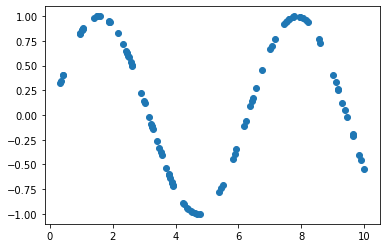

In [157]:
x = np.random.rand(100) * 10
y = np.sin(x)
plt.scatter(x, y)

数据加噪

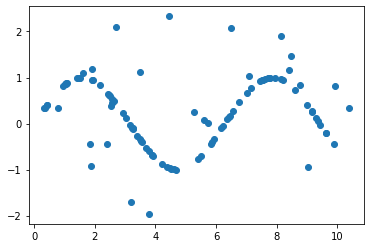

In [158]:
x[::4] += np.random.randn(25)
y[::4] += np.random.randn(25)
plt.scatter(x, y)

建立模型，训练数据，并预测数据，预测训练数据就行

In [161]:
x_test = np.linspace(0, 10, 100).reshape(-1, 1)

In [162]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(x.reshape(-1, 1), y)
y_linear = svr_linear.predict(x_test)
svr_linear.score(x.reshape(-1,1), y)

-0.010562694363732472

In [168]:
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x.reshape(-1, 1), y)
y_rbf = svr_rbf.predict(x_test)
svr_rbf.score(x.reshape(-1,1), y)

0.4163337627678563

In [169]:
svr_poly = SVR(kernel='poly')
svr_poly.fit(x.reshape(-1, 1), y)
y_poly = svr_poly.predict(x_test)
svr_poly.score(x.reshape(-1,1), y)

d:\2005\.venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.007092899712069833

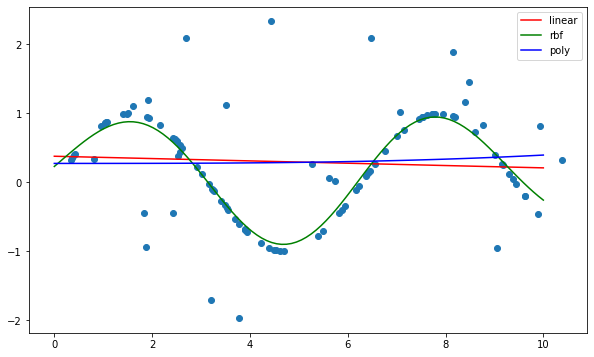

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x_test, y_linear, label='linear', c='r')
plt.plot(x_test, y_rbf, label='rbf', c='g')
plt.plot(x_test, y_poly, label='poly', c='b')
plt.legend()


绘制图形，观察三种支持向量机内核不同

## 三、作业

### 1、使用不同核对下面三个数据集进行分类，并画出分类边界

- ex6data1.mat
- ex6data2.mat
- ex6data3.mat


### 2、使用SVC对cars.txt进行分析

In [ ]:
# 用上前面学过的所有的分类算法,进行对比.

这是一个关于汽车测评的数据集，类别变量为汽车的测评，（unacc，ACC，good，vgood）分别代表（不可接受，可接受，好，非常好），而6个属性变量分别为「买入价」，「维护费」，「车门数」，「可容纳人数」，「后备箱大小」，「安全性」。值得一提的是6个属性变量全部是有序类别变量，比如「可容纳人数」值可为「2，4，more」，「安全性」值可为「low, med, high」

price、maint、doors、persons、lug_boot、safty、recommend